Wei Guo

# Abstract

In this project, I use the Pokemon Dataset in Kaggle. I focus on the attribute **Legendary**. I try to build model to predict whether a specific pokemon is Legendary or not.

# Experimental Design

I first use data visualization to explore the relationship of attributes. Then use Principal components analysis(PCA) to reduce the dimension. With the tranformed dataset, I implement *Decision Tree*, *K-nearest neighbors*, *Random Forest*, *AdaBoost* and *Support Vector Machine* to build the predictive model. I also tune the model parameters by cross validation and gridsearch.Then I make comparasion among all the models and find the ones with the best performance.

# Dataset

In [119]:
import pandas as pd
import numpy as np

In [120]:
pkm = pd.read_csv('/Users/guowei/Desktop/6316/hw/3/Pokemon.csv')

In [122]:
pkm.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

ID: ID for each pokemon<br>

Name: Name of each pokemon<br>

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks<br>

Type 2: Some pokemon are dual type and have 2<br>

Total: sum of all stats that come after this, a general guide to how strong a pokemon is<br>

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting<br>

Attack: the base modifier for normal attacks (eg. Scratch, Punch)<br>

Defense: the base damage resistance against normal attacks<br>

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)<br>

SP Def: the base damage resistance against special attacks<br>

Speed: determines which pokemon attacks first each round<br>

Generation: when the pokemon pokemon appears for the first time<br>

Legendary: whether the pokemon is legendary or not

# Variable Selection

## EDA

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

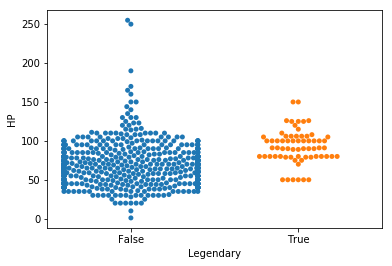

In [199]:
sns.swarmplot(x="Legendary",y="HP",data=pkm)
plt.show()

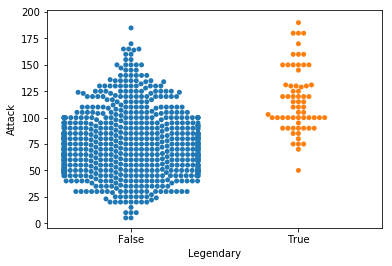

In [200]:
sns.swarmplot(x="Legendary",y="Attack",data=pkm)
plt.show()

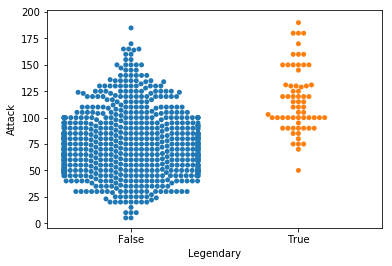

In [12]:
sns.swarmplot(x="Legendary",y="Attack",data=pkm)
plt.show()

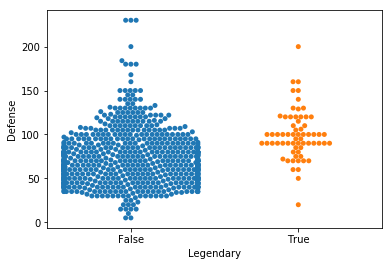

In [201]:
sns.swarmplot(x="Legendary",y="Defense",data=pkm)
plt.show()

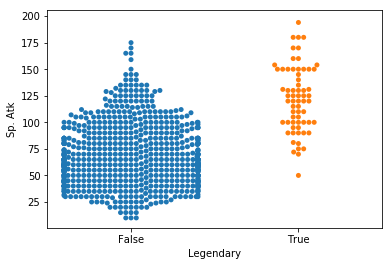

In [202]:
sns.swarmplot(x="Legendary",y="Sp. Atk",data=pkm)
plt.show()

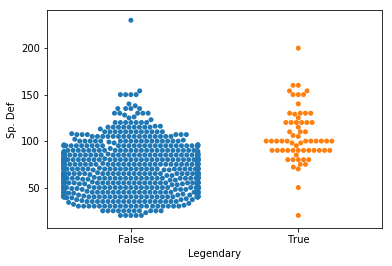

In [203]:
sns.swarmplot(x="Legendary",y="Sp. Def",data=pkm)
plt.show()

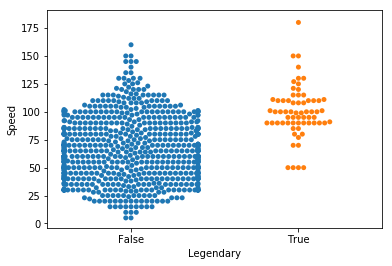

In [204]:
sns.swarmplot(x="Legendary",y="Speed",data=pkm)
plt.show()

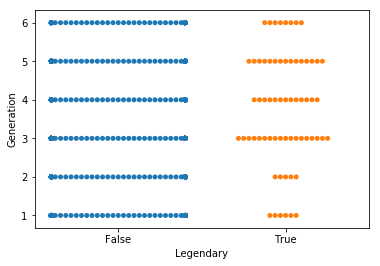

In [205]:
sns.swarmplot(x="Legendary",y="Generation",data=pkm)
plt.show()

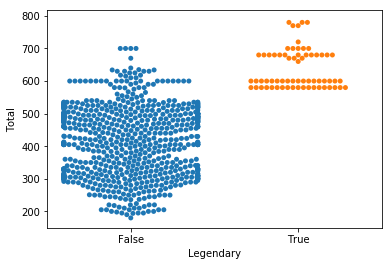

In [206]:
sns.swarmplot(x="Legendary",y="Total",data=pkm)
plt.show()

From the swarmplots, I dont find strong correlation between either attribute. But "Total" can show something. So I try to use PCA to reduce the dimension.

In [125]:
pkm1 = pkm.drop(['#','Name','Generation'],1)

In [126]:
pkm1.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


## PCA

In [127]:
pkm_attributes = pkm1.drop(['Legendary','Type 1','Type 2'],1)

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=pkm_attributes.shape[1])
fit = pca.fit(pkm_attributes).transform(pkm_attributes)

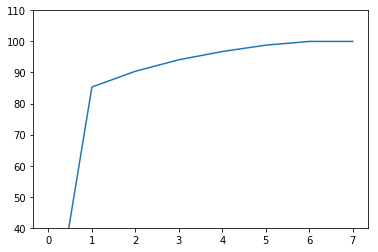

In [129]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1 = np.insert(var1,0,0)
plt.plot(var1)
axes = plt.gca()
axes.set_ylim([40,110])
plt.show()

Based on the ratio, I choose to choose **n=3**.

In [130]:
pca = PCA(n_components=3)
fit = pca.fit(pkm_attributes).transform(pkm_attributes)
fit1 = pd.DataFrame(fit,columns=['c1','c2','c3'])
df = pd.concat([fit1,pkm1['Legendary']],axis=1)

## Results of the variable selection

delete two categorical attributes(type1,type2), use PCA to transform the dataset. Remain the first three Component Scores as the features used in futural model.

In [131]:
df.head()

,c1,c2,c3,Legendary
0,-125.859080,-5.205879,19.045828,False
1,-32.129956,-5.765084,20.865708,False
2,97.226798,-5.389766,21.389753,False
3,206.067079,18.630885,28.969078,False
4,-135.909253,-21.589003,4.078772,False


# Results of Model

## Split dataset into train and test

In the following part, I will make **False = 1, True = 0** in Legendary.

In [132]:
leg = abs((df['Legendary'].values - 1))

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(fit, leg, test_size=0.33, random_state=42)

## Decision Tree

In [182]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(10,30))


# empty list that will hold cross validation scores
cv_scores = []

# perform 10-fold cross validation we are already familiar with
for k in myList:
    clf = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

The optimal number of max depth is 14


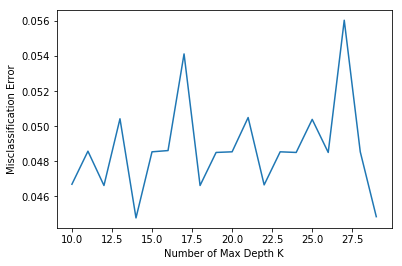

In [183]:
# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of max depth is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Max Depth K')
plt.ylabel('Misclassification Error')
plt.show()

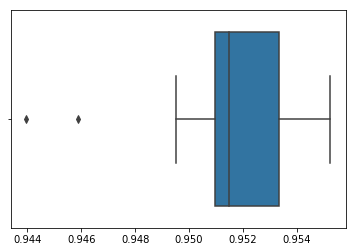

In [184]:
ax = sns.boxplot(x = cv_scores)
plt.show()

### Best Model Confusion Matrix

In [186]:
from sklearn.metrics import confusion_matrix

clf = tree.DecisionTreeClassifier(max_depth=14)
clf.fit(X_train, y_train) 
y_predict_dt = clf.predict(X_test)
c_df = confusion_matrix(y_test, y_predict_dt)
c_df
# definition is here
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

array([[ 12,   4],
       [  6, 242]], dtype=int64)

## K-nearest Neighbor

In [138]:
from sklearn.neighbors import KNeighborsClassifier
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cross validation scores
cv_scores = []

# perform 10-fold cross validation we are already familiar with
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]


The optimal number of neighbors is 13


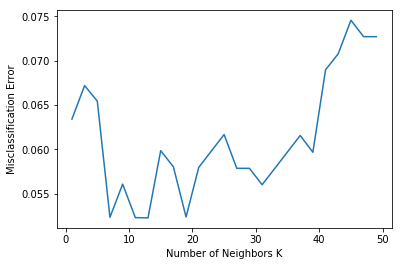

In [139]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

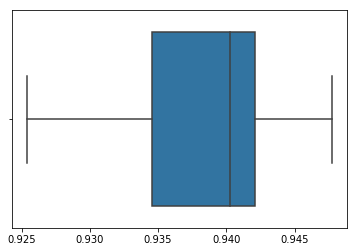

In [140]:
ax = sns.boxplot(x = cv_scores)
plt.show()

### Best Model Confusion Matrix

In [141]:

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train) 

y_predict_knn = knn.predict(X_test)
confusion_matrix(y_test, y_predict_knn)
# http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

array([[ 14,   2],
       [ 10, 238]], dtype=int64)

## Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
# creating odd list of K for KNN
myList = list(range(1, 50, 2))

# empty list that will hold cross validation scores
cv_scores = []

# perform 10-fold cross validation we are already familiar with
#n estimators：
for k in myList:
    clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators = k)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]


The optimal number of n estimator is 5


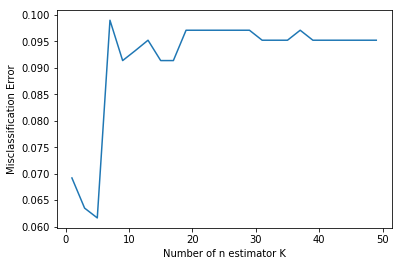

In [163]:
# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of n estimator is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of n estimator K')
plt.ylabel('Misclassification Error')
plt.show()

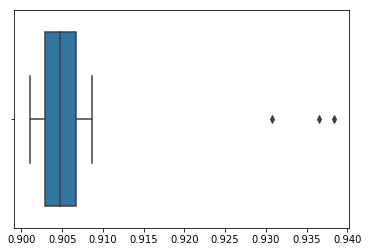

In [164]:
ax = sns.boxplot(x = cv_scores)
plt.show()

### Best Model Confusion Matrix

In [165]:
from sklearn.ensemble import RandomForestClassifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators = 5)
clf.fit(X_train, y_train)
y_predict_rf = clf.predict(X_test)
confusion_matrix(y_test, y_predict_rf)

array([[  8,   8],
       [  8, 240]], dtype=int64)

## AdaBoost

In [193]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# creating odd list of K for KNN
myList = list(range(100,1000, 100))


# empty list that will hold cross validation scores
cv_scores = []

# perform 10-fold cross validation we are already familiar with
#n estimators：
for k in myList:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=k)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

The optimal number of n estimator is 200


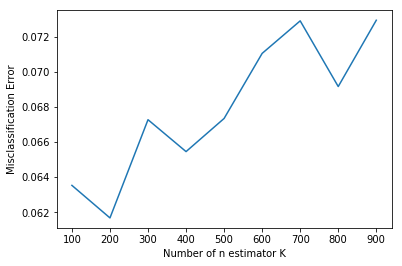

In [194]:
# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of n estimator is %d" % optimal_k)

# # plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of n estimator K')
plt.ylabel('Misclassification Error')
plt.show()

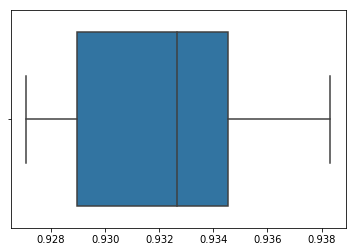

In [195]:
ax = sns.boxplot(x = cv_scores)
plt.show()

### Best Model Confusion Matrix

In [196]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(X_train,y_train)
y_predict_ab = bdt.predict(X_test)
c_ada = confusion_matrix(y_test, y_predict_ab)
c_ada

array([[ 13,   3],
       [  7, 241]], dtype=int64)

## SVM

Here I use Grid Search to tune SVM.So I cannot visualize it as before.

In [188]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svm.SVC(), param_grid={"C":[0.001,0.1, 1, 10], "gamma": [1, 0.1, 0.01,0.001]}, cv=4)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 0.001} with a score of 0.95


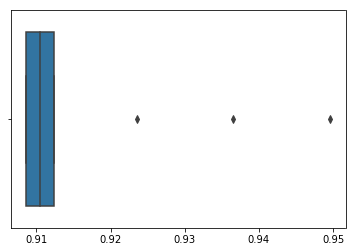

In [189]:
cv_scores = grid.cv_results_['mean_test_score']
cv_scores
ax = sns.boxplot(x = cv_scores)
plt.show()

### Best Model Confusion Matrix

In [190]:
clf = svm.SVC(C=1,gamma=0.001)
clf.fit(X_train,y_train)
y_predict_svm = clf.predict(X_test)

In [192]:
c_svm = confusion_matrix(y_test, y_predict_svm)
c_svm

array([[  7,   9],
       [  6, 242]], dtype=int64)

# Discussion

In this project, I implement different algorithms to make classification with threee generated variables based on PCA. Since the legendray pokemons only take a very small portion of all, the performances don't differ greatly. But among all algorithms, decision tree and adaboost have the highest accuracy.The shortage of adaboost is that it runs much more slowly than all the other algorithms.<br>
Among all models, Random Forest has the worst performance. The reason might be the structure of our dataset.<br>
Tuning the model helps a lot. All the models perform better with tuned parameters than that with default values.

# Conclusion

#### confusion matrix of Decision Tree

In [187]:
c_df

array([[ 12,   4],
       [  6, 242]], dtype=int64)

#### confusion matrix of adaBoost

In [197]:
c_ada

array([[ 13,   3],
       [  7, 241]], dtype=int64)

Among all these models, decision tree and adaboost have the best accuracy.<br>

**Accuracy**: The accuracy is both **96.21%**.<br>

**Specificity**: The accuracy for decision tree is **75%**, for adaboost is **81.25%**.<br>

**Precision**: The precision for decision tree is **98.37%**, for adaboost is **99.18%**.<br>

**Sensitivity**: The sensitivity for decision tree is **97.58%**, for adaboost is **97.18**.

While they have the same accuracy, among the other three indexes, adaboost is higher in two of them than decision tree. So I think **AdaBoost** is the best model in this project.

In [8]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')